In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
from tensorflow.keras.preprocessing import sequence
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [5]:
x_train.shape

(25000, 100)

In [6]:
y_test.shape

(25000,)

In [7]:
y_train.shape

(25000,)

In [8]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
y_test_one_hot.shape

(25000, 2)

In [11]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [13]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 32)           3104      
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 2)                 6402      
                                                                 
Total params: 649,506
Trainable params: 649,506
Non-trainable params: 0
_________________________________________________________________


In [14]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [15]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
checkpoint_filepath = './temp/checkpoint_en_concat'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [16]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics='accuracy')

In [17]:
history = model.fit(x_train, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
157/157 [==============================] - 7s 33ms/step - loss: 0.6460 - accuracy: 0.6128 - val_loss: 0.5779 - val_accuracy: 0.7000
Epoch 2/20
157/157 [==============================] - 5s 32ms/step - loss: 0.4731 - accuracy: 0.7764 - val_loss: 0.4673 - val_accuracy: 0.7802
Epoch 3/20
157/157 [==============================] - 5s 31ms/step - loss: 0.3725 - accuracy: 0.8386 - val_loss: 0.4149 - val_accuracy: 0.8130
Epoch 4/20
157/157 [==============================] - 5s 32ms/step - loss: 0.3191 - accuracy: 0.8666 - val_loss: 0.4043 - val_accuracy: 0.8196
Epoch 5/20
157/157 [==============================] - 5s 33ms/step - loss: 0.2816 - accuracy: 0.8856 - val_loss: 0.3862 - val_accuracy: 0.8240
Epoch 6/20
157/157 [==============================] - 5s 34ms/step - loss: 0.2541 - accuracy: 0.8999 - val_loss: 0.4081 - val_accuracy: 0.8178
Epoch 7/20
157/157 [==============================] - 5s 33ms/step - loss: 0.2317 - accuracy: 0.9101 - val_loss: 0.3982 - val_accuracy: 0.8270

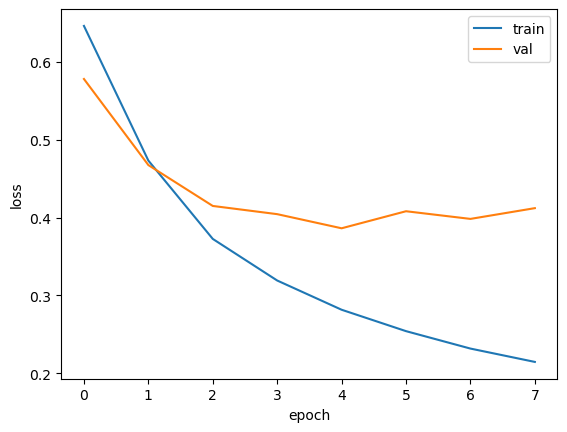

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

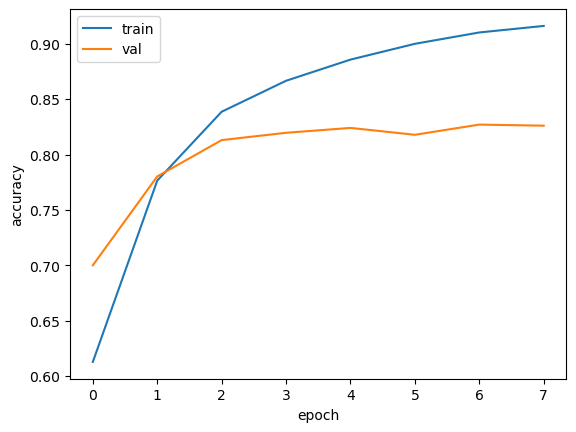

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [21]:
model.load_weights(checkpoint_filepath)

In [22]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 4s 5ms/step - loss: 0.3956 - accuracy: 0.8224


In [23]:
print('test_acc:', test_acc)

test_acc: 0.8223999738693237
